##### Copyright 2019 The TensorFlow IO Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# 의료 영상용 DICOM 파일 디코딩하기

<table class="tfo-notebook-buttons" align="left">
  <td><a target="_blank" href="https://www.tensorflow.org/io/tutorials/dicom"><img src="https://www.tensorflow.org/images/tf_logo_32px.png">TensorFlow.org에서 보기</a></td>
  <td><a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/ko/io/tutorials/dicom.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png">Google Colab에서 실행하기</a></td>
  <td><a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/ko/io/tutorials/dicom.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png">GitHub에서소스 보기</a></td>
      <td><a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/ko/io/tutorials/dicom.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png">노트북 다운로드하기</a></td>
</table>

## 개요

이 튜토리얼에서는 TensorFlow IO에서 `tfio.image.decode_dicom_image`를 사용하여 TensorFlow로 DICOM 파일을 디코딩하는 방법을 보여줍니다.

## 설정 및 사용법

#### DICOM 이미지 다운로드하기

이 튜토리얼에 사용된 DICOM 이미지는 [NIH 흉부 X-레이 데이터세트](https://cloud.google.com/healthcare/docs/resources/public-datasets/nih-chest)에서 가져왔습니다.

NIH 흉부 X-레이 데이터세트는 NIH Clinical Center에서 신원 식별 정보를 제거한 상태로 제공하는 100,000개의 PNG 형식 흉부 X-레이 이미지로 구성되며 이 [링크](https://nihcc.app.box.com/v/ChestXray-NIHCC)를 통해 다운로드할 수 있습니다.

Google Cloud에서도 [클라우드 스토리지](https://cloud.google.com/healthcare/docs/resources/public-datasets/nih-chest)에서 사용할 수 있는 DICOM 버전의 이미지를 제공합니다.

이 튜토리얼에서는 [GitHub 리포지토리](https://github.com/tensorflow/io/raw/master/docs/tutorials/dicom/dicom_00000001_000.dcm)에서 데이터세트의 샘플 파일을 다운로드합니다.

참고: 데이터세트에 대한 자세한 내용은 다음 참고 문헌을 확인하세요.

- Xiaosong Wang, Yifan Peng, Le Lu, Zhiyong Lu, Mohammadhadi Bagheri, Ronald Summers, ChestX-ray8: Hospital-scale Chest X-ray Database and Benchmarks on Weakly-Supervised Classification and Localization of Common Thorax Diseases, IEEE CVPR, pp. 3462-3471, 2017


In [2]:
!curl -OL https://github.com/tensorflow/io/raw/master/docs/tutorials/dicom/dicom_00000001_000.dcm
!ls -l dicom_00000001_000.dcm

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

100   164  100   164    0     0    488      0 --:--:-- --:--:-- --:--:--   488


100 1024k  100 1024k    0     0  1616k      0 --:--:-- --:--:-- --:--:-- 1616k


-rw-rw-r-- 1 kbuilder kokoro 1049332 Aug 25 20:26 dicom_00000001_000.dcm


### 필수 패키지를 설치하고 런타임 다시 시작하기

In [3]:
try:
  # Use the Colab's preinstalled TensorFlow 2.x
  %tensorflow_version 2.x 
except:
  pass

In [4]:
!pip install tensorflow-io

     |                                | 30 kB 7.0 MB/s eta 0:00:04

     |███████▊                        | 5.5 MB 10.6 MB/s eta 0:00:02

     |█████████████████▍              | 12.3 MB 10.6 MB/s eta 0:00:01

     |██████████████████████████▊     | 18.9 MB 10.6 MB/s eta 0:00:01

     |████████████████████████████████| 22.7 MB 10.6 MB/s eta 0:00:01

     |████████████████████████████████| 22.7 MB 10.6 MB/s 


     |████████████████████████████████| 2.3 MB 89.8 MB/s 


You should consider upgrading via the '/tmpfs/src/tf_docs_env/bin/python -m pip install --upgrade pip' command.


### DICOM 이미지 디코딩하기

In [5]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

2021-08-25 20:26:22.929816: W tensorflow_io/core/kernels/audio_video_mp3_kernels.cc:271] libmp3lame.so.0 or lame functions are not available


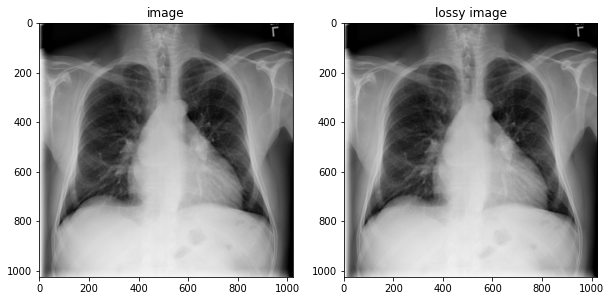

In [6]:
import tensorflow_io as tfio

image_bytes = tf.io.read_file('dicom_00000001_000.dcm')

image = tfio.image.decode_dicom_image(image_bytes, dtype=tf.uint16)

skipped = tfio.image.decode_dicom_image(image_bytes, on_error='skip', dtype=tf.uint8)

lossy_image = tfio.image.decode_dicom_image(image_bytes, scale='auto', on_error='lossy', dtype=tf.uint8)


fig, axes = plt.subplots(1,2, figsize=(10,10))
axes[0].imshow(np.squeeze(image.numpy()), cmap='gray')
axes[0].set_title('image')
axes[1].imshow(np.squeeze(lossy_image.numpy()), cmap='gray')
axes[1].set_title('lossy image');

## 문서

이 패키지에는 `DCMTK` 함수를 래핑하는 두 가지 연산이 있습니다. `decode_dicom_image`는 DICOM 파일의 픽셀 데이터를 디코딩하고 `decode_dicom_data`는 태그 정보를 디코딩합니다. `tags`에는 `tags.PatientsName`과 같은 유용한 DICOM 태그가 포함됩니다. 태그 표기법은 [`pydicom`](https://pydicom.github.io/) dicom 패키지에서 빌려왔습니다.

### DICOM 이미지 데이터 가져오기

```python
io.dicom.decode_dicom_image(     contents,     color_dim=False,     on_error='skip',     scale='preserve',     dtype=tf.uint16,     name=None )
```

- **`contents`**: 문자열 유형의 텐서입니다(0-D). 바이트 문자열로 인코딩된 DICOM 파일
- **`color_dim`**: 선택적 `bool`입니다. 기본값은 `False`입니다. `True`이면 3-D 텐서를 형성하는 모든 이미지에 세 번째 채널이 추가됩니다. 1024 x 1024 그레이스케일 이미지는 1024 x 1024 x 1입니다.
- **`on_error`**: 기본값은 `skip`입니다. 이 속성은 이미지를 열 때 오류가 발생하거나 출력 유형이 가능한 모든 입력 값을 수용할 수 없는 경우에 동작을 설정합니다. 사용자가 출력 dtype을 `tf.uint8`로 설정했지만 dicom 이미지가 `tf.uint16` 유형을 저장하는 경우를 예로 들 수 있습니니다. `strict`이 오류를 발생시킵니다. `skip`은 1-D의 빈 텐서를 반환합니다. `lossy`는 `scale` 속성을 통해 값을 조정하는 연산을 계속합니다.
- **`scale`**:  기본값은 `preserve`입니다. 이 속성은 입력 값의 스케일을 처리하는 방법을 설정합니다. `auto`는 입력 값의 스케일을 자동으로 조정합니다. 출력 유형이 정수이면 `auto`에 최대 출력 스케일이 사용됩니다. 예를 들어, [0, 255]의 값을 저장하는 `uint8`은 [0.65535]인 `uint16`을 채우도록 선형적으로 늘릴 수 있습니다. 출력이 부동 소수점이면 `auto`가 [0,1]로 스케일 조정됩니다. <code>preserve</code>는 값을 그대로 유지하며, 가능한 최대 출력보다 큰 입력 값은 잘립니다.
- **`dtype`**: `tf.uint8, tf.uint16, tf.uint32, tf.uint64, tf.float16, tf.float32, tf.float64`에서 선택할 수 있는 `tf.DType`입니다. 기본값은 `tf.uint16`입니다.
- **`name`**: 연산의 이름(선택 사항)

`dtype` 유형의 A `Tensor`를 **반환**하고 형상은 DICOM 파일에 의해 결정됩니다.

### DICOM 태그 데이터 가져오기

```python
io.dicom.decode_dicom_data(     contents,     tags=None,     name=None )
```

- **`contents`**: 문자열 유형의 텐서입니다(0-D). 바이트 문자열로 인코딩된 DICOM 파일
- **`tags`**: 모든 차원의 `tf.uint32` 유형 텐서입니다. 이러한 `uint32` 숫자는 DICOM 태그에 직접 매핑됩니다.
- **`name`**: 연산의 이름(선택 사항)

`tf.string` 유형의 `Tensor` 및 `tags`와 동일한 형상을 **반환**합니다.  dicom 태그가 문자열 목록인 경우, 목록이 하나의 문자열로 결합되고 이중 백슬레시 ``tf.string` 유형의 `Tensor` 및 `tags`와 동일한 형상을 **반환**합니다.  dicom 태그가 문자열 목록인 경우, 목록이 하나의 문자열로 결합되고 이중 백슬레시 로 분리됩니다. 태그가 숫자 목록인 경우 [DCMTK](https://support.dcmtk.org/docs/)에 버그가 있으며 0번째 요소만 문자열로 반환됩니다.

### Bibtex

이 패키지가 도움이 되었다면 아래 내용을 인용해주세요.

```
@misc{marcelo_lerendegui_2019_3337331,   author       = {Marcelo Lerendegui and                   Ouwen Huang},   title        = {Tensorflow Dicom Decoder},   month        = jul,   year         = 2019,   doi          = {10.5281/zenodo.3337331},   url          = {https://doi.org/10.5281/zenodo.3337331} }
```

### 라이선스

Copyright 2019 Marcelo Lerendegui, Ouwen Huang, Gradient Health Inc.

Apache 라이선스 버전 2.0("라이선스")에 따라 사용이 허가되었습니다. 라이선스를 준수하지 않으면 이 파일을 사용할 수 없습니다. 다음 위치에서 라이선스 사본을 얻을 수 있습니다.

http://www.apache.org/licenses/LICENSE-2.0

관련 법률에서 요구하거나 서면으로 합의한 경우가 아니면 라이선스에 따라 배포된 소프트웨어는 명시적이든 묵시적이든 어떤 종류의 보증이나 조건도 없이 "있는 그대로" 배포됩니다. 라이선스에 따른 권한 및 제한 사항을 규정하는 특정 언어는 라이선스를 참조하세요.